#### Importig libraries

In [65]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt

#### Loading dataset

In [66]:
os.listdir()

['.ipynb_checkpoints',
 'Forest Fire.ipynb',
 'forestfires.csv',
 'forestfires.names']

In [67]:
data = pd.read_csv('forestfires.csv')

### EDA

In [68]:
data.shape

(517, 13)

In [69]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [70]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


ISI


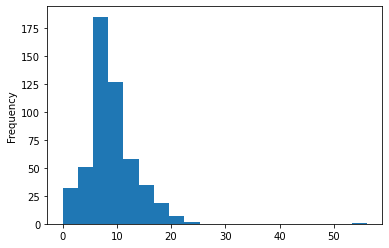

rain


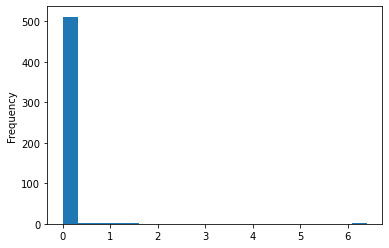

area


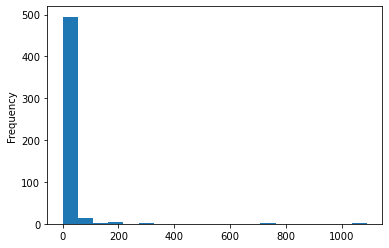

RH


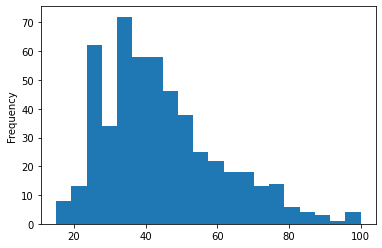

Y


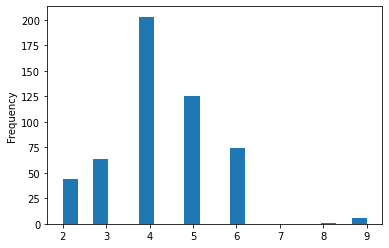

DC


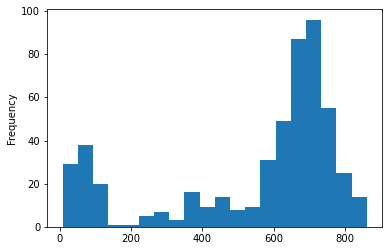

temp


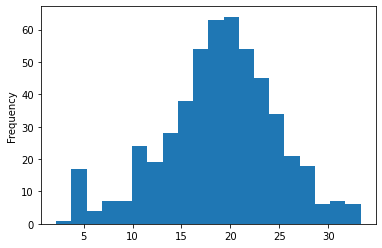

wind


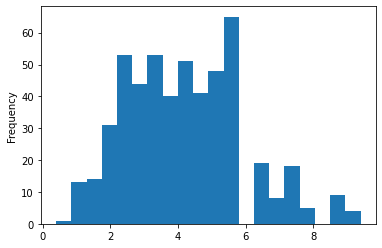

DMC


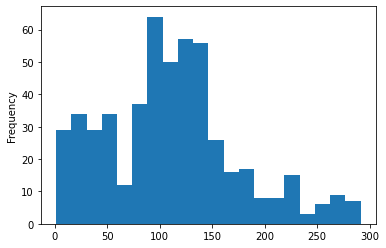

X


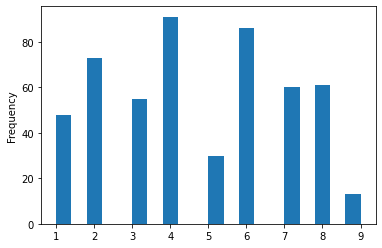

FFMC


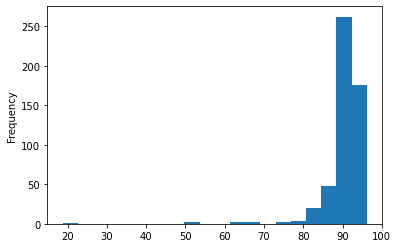

In [71]:
for i in set(data.columns)-set(['month', 'day']):
    data[i].plot.hist(bins = 20)
    print(i)
    plt.show()

ISI


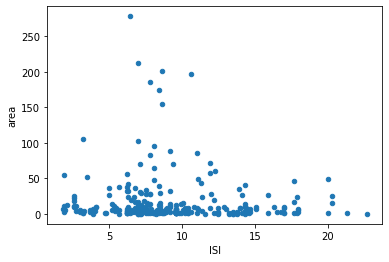

rain


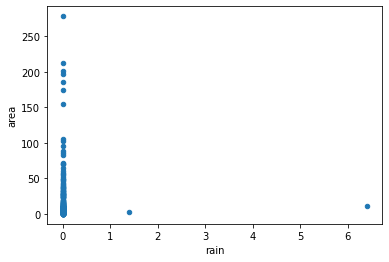

area


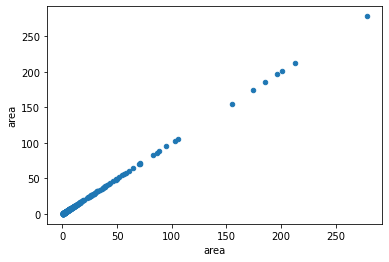

RH


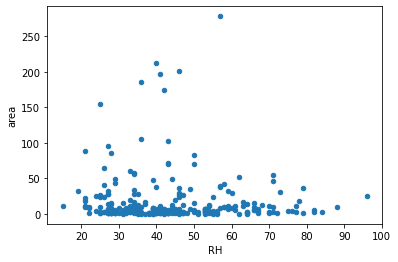

Y


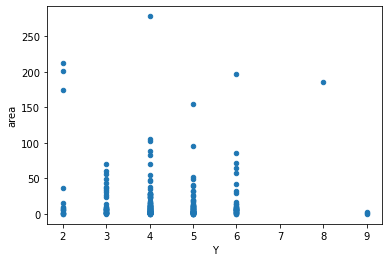

DC


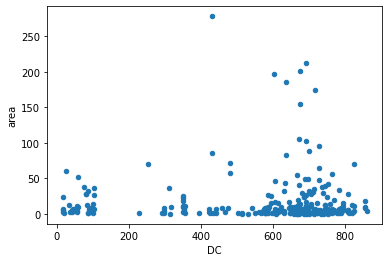

temp


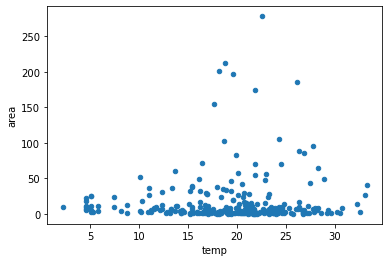

wind


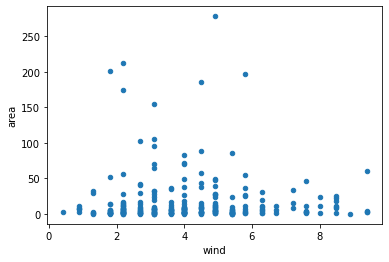

DMC


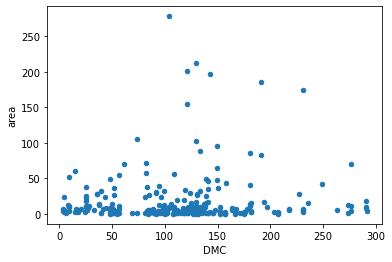

X


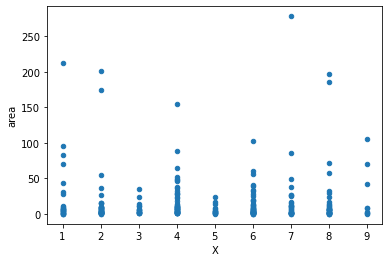

FFMC


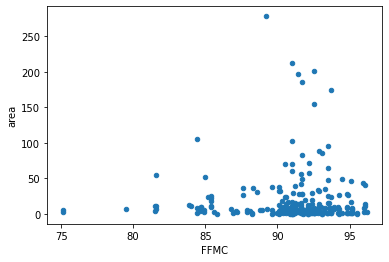

In [72]:
for i in set(data.columns)-set(['month', 'day']):
    print(i)
    data[(data['area'] > 0) & (data['area'] < 600) & (data['FFMC'] > 75)].plot.scatter(x = i, y = 'area')
    plt.show()



#### Modeling

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error, regression

In [86]:
data = pd.get_dummies(data[data['area'] < 200])
#data = pd.get_dummies(data)

In [87]:
data.shape

(512, 30)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data[list(set(data.columns)-set(['area']))], data['area'], test_size=0.25, random_state=42)

In [76]:
X_train.shape

(387, 29)

In [93]:
#X_train['pred'] = regr.predict(X_train)
#X_train['act'] = y_train
X_train['error'] = abs(X_train['act'] - X_train['pred'])

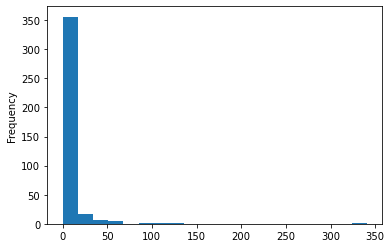

In [97]:
X_train['error'].plot.hist(bins = 20)

In [91]:
X_train.to_csv('output.csv')

In [80]:
regr = RandomForestRegressor(max_depth=15, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=0)

In [81]:
mean_absolute_error(y_train, regr.predict(X_train))

7.624292508444837

In [82]:
mean_absolute_error(y_test, regr.predict(X_test))

22.78003220067041

In [83]:
mean_absolute_error(y_train, regr.predict(X_train))


7.624292508444837

In [84]:
mean_absolute_error(y_test, regr.predict(X_test))

22.78003220067041